<a href="https://colab.research.google.com/github/ob3dd/Prediction-of-Product-Sales/blob/main/Prediction_of_Product_Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Prediction of Product Sales

**Obed Okoro**

##Project Overview

##Load and Inspect Data

In [256]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

fname = '/content/drive/MyDrive/CodingDojo/01-Fundamentals/Week02/Data/sales_predictions_2023.csv'

In [257]:
df_sales = pd.read_csv('/content/drive/MyDrive/CodingDojo/01-Fundamentals/Week02/Data/sales_predictions_2023.csv')

In [258]:
df_sales.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [259]:
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


##Clean Data

In [260]:
# figuring out how many rows and columns
df_sales.shape

(8523, 12)

There are 8523 rows and 12 columns.

In [261]:
# the datatypes of each variable
df_sales.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [262]:
# checking if there are any duplicates.
df_sales.duplicated().sum().sum()

0

There are no duplicates.

In [263]:
# Identifying missing values.
missing_values = df_sales.isnull().any(axis=0)

In [264]:
# Addressing the missing values by using a placeholder value.
placeholder_value = 'missing'
df_sales.fillna(placeholder_value, inplace=True)

In [265]:
#printing to check if the 'missing' value has been updated
df_sales

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.3,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.5,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.2,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,missing,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.38,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,missing,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.6,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.21,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [266]:
# printing the result using the "if" function to confirm whether there are any missing values or not

missing_values_after = df_sales.isnull().any(axis=0)

if missing_values_after.any():
    print("There are still missing values in the data.")
else:
    print("There are no missing values in the data.")

There are no missing values in the data.


In [267]:
# Finding and fixing any inconsistent categories of data.
# the "Item Fat Column" was inconsistent
item_fat_column = 'Item_Fat_Content'
item_counts = df_sales[item_fat_column].value_counts()


In [268]:
# replacing the "LF, low fat" inconsistencies with 'Low Fat' so they can be consistent.
df_sales['Item_Fat_Content'] = df_sales['Item_Fat_Content'].replace({'LF':"Low Fat",'low fat':'Low Fat'})
df_sales['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    2889
reg         117
Name: Item_Fat_Content, dtype: int64

In [269]:
# repeating the same process for the "regular"
df_sales['Item_Fat_Content'] = df_sales['Item_Fat_Content'].replace({'regular':"Regular",'reg':'Regular'})
df_sales['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [270]:
# printing the column
print(df_sales['Item_Fat_Content'])

0       Low Fat
1       Regular
2       Low Fat
3       Regular
4       Low Fat
         ...   
8518    Low Fat
8519    Regular
8520    Low Fat
8521    Regular
8522    Low Fat
Name: Item_Fat_Content, Length: 8523, dtype: object


In [271]:
df_sales.describe()

,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000
mean,0.066132,140.992782,1997.831867,2181.288914
std,0.051598,62.275067,8.371760,1706.499616
min,0.000000,31.290000,1985.000000,33.290000
25%,0.026989,93.826500,1987.000000,834.247400
50%,0.053931,143.012800,1999.000000,1794.331000
75%,0.094585,185.643700,2004.000000,3101.296400
max,0.328391,266.888400,2009.000000,13086.964800


##Exploratory Data Analysis

In [272]:
# Checking info again
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   object 
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(3), int64(1), object(8)
memory usage: 799.2+ KB


In [273]:
# Checking the the total number and length of the dataset using value_counts()
df_sales['Item_Outlet_Sales'].value_counts()

958.7520     17
1342.2528    16
703.0848     15
1845.5976    15
1278.3360    14
             ..
4124.6310     1
6622.7126     1
1614.5650     1
5602.7070     1
2778.3834     1
Name: Item_Outlet_Sales, Length: 3493, dtype: int64

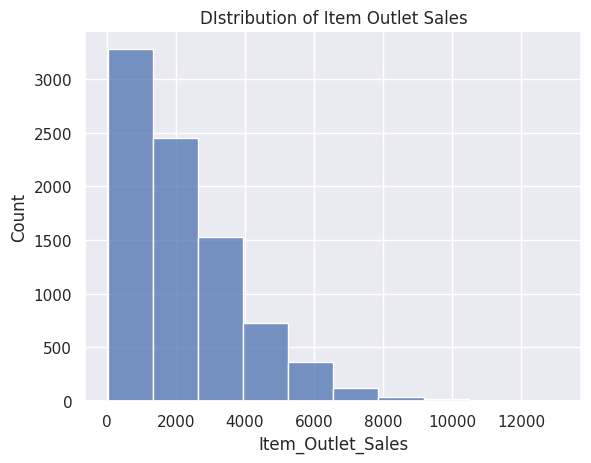

In [274]:
# Creating a histogram view the distributions of Item_Outlet_Sales
ax = sns.histplot(data = df_sales, x='Item_Outlet_Sales', bins= 10);
#Adding a title
ax.set_title('DIstribution of Item Outlet Sales');

The highest number of sales were over 3,000

We can also see that the data is positively skewed


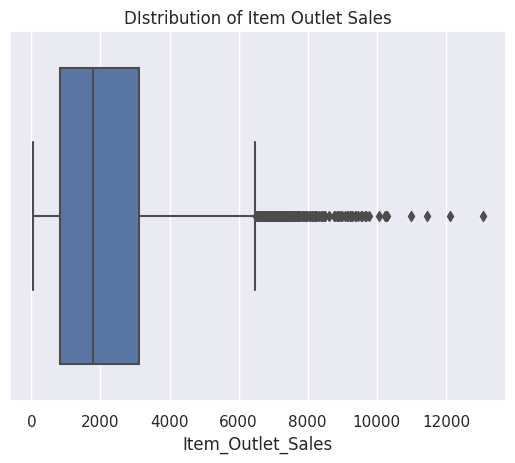

In [275]:
# Creating a Boxplot to view statistical summaries of Item Outlet Sales
ax = sns.boxplot(data = df_sales, x ='Item_Outlet_Sales');

#Adding a title
ax.set_title('DIstribution of Item Outlet Sales');

In [276]:
# Checking the the total number and length of the dataset using value_counts()
df_sales['Item_Visibility'].value_counts()

0.000000    526
0.076975      3
0.162462      2
0.076841      2
0.073562      2
           ... 
0.013957      1
0.110460      1
0.124646      1
0.054142      1
0.044878      1
Name: Item_Visibility, Length: 7880, dtype: int64

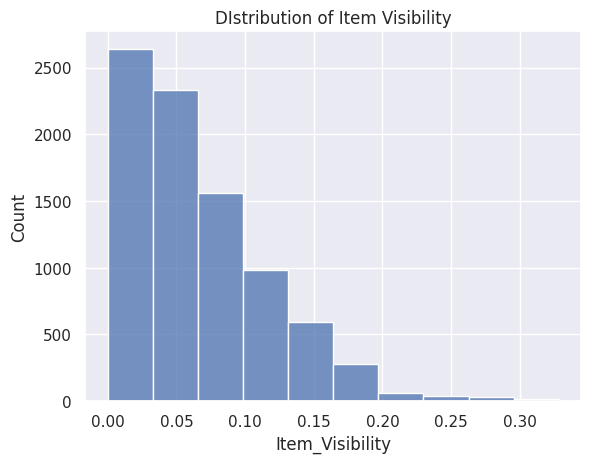

In [277]:
# Creating a histogram view the distributions of Item Visibility
ax = sns.histplot(data = df_sales, x ='Item_Visibility', bins= 10);
sns.set(style='darkgrid')
#Adding a title
ax.set_title('DIstribution of Item Visibility');

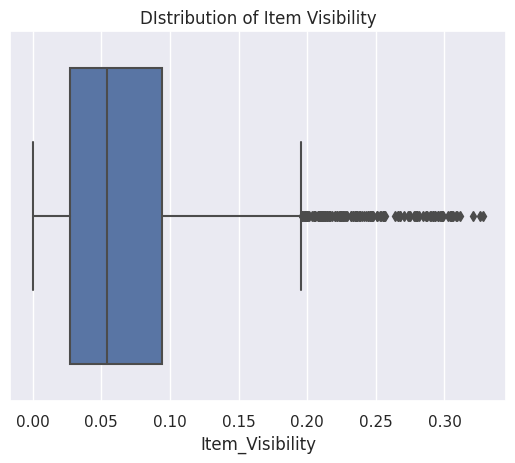

In [278]:
# Creating a Boxplot to view statistical summaries of Item_Visibility
ax = sns.boxplot(data = df_sales, x ='Item_Visibility');

#Adding a title
ax.set_title('DIstribution of Item Visibility');

In [279]:
# Checking the the total number and length of the dataset using value_counts()
df_sales['Item_MRP'].value_counts()

172.0422    7
170.5422    6
196.5084    6
188.1872    6
142.0154    6
           ..
97.3384     1
83.1934     1
96.6752     1
152.6682    1
75.4670     1
Name: Item_MRP, Length: 5938, dtype: int64

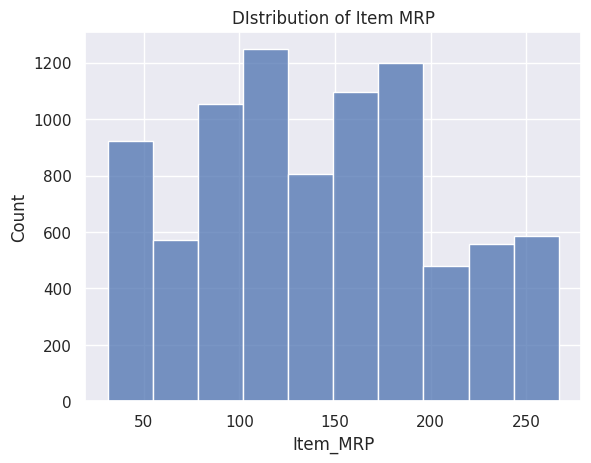

In [280]:
#Creating a histogram view the distributions of Item MRP
#bins to 10
ax = sns.histplot(data = df_sales, x ='Item_MRP', bins = 10);
sns.set(style='darkgrid')
#Adding a title
ax.set_title('DIstribution of Item MRP');

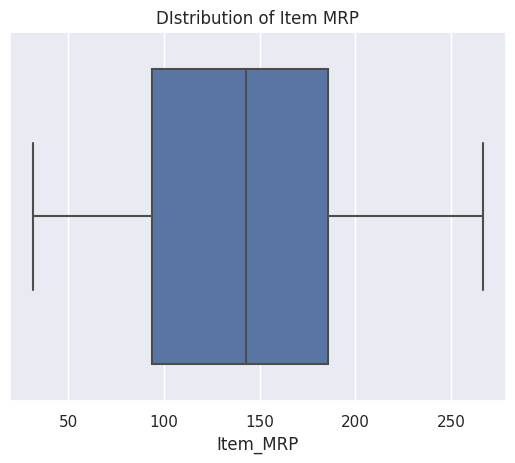

In [281]:
#Creating a boxplot view the distributions of Item MRP
ax = sns.boxplot(data = df_sales, x ='Item_MRP');
#Adding a title
ax.set_title('DIstribution of Item MRP');

In [282]:
# Checking the the total number and length of the dataset using value_counts()
df_sales['Outlet_Establishment_Year'].value_counts()

1985    1463
1987     932
1999     930
1997     930
2004     930
2002     929
2009     928
2007     926
1998     555
Name: Outlet_Establishment_Year, dtype: int64

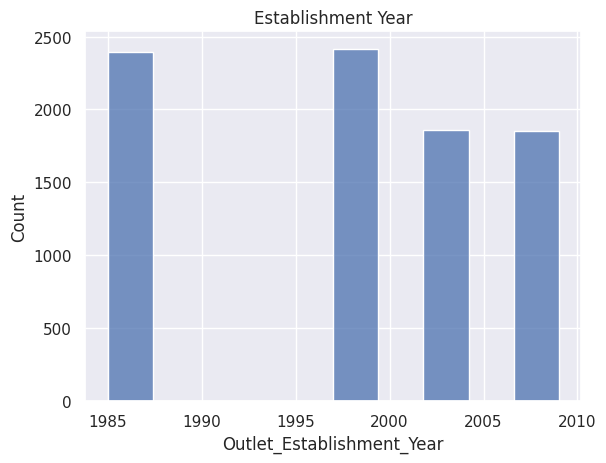

In [283]:
#Creating a histogram view the Outlet_Establishment_Year
#bins to 10
ax = sns.histplot(data = df_sales, x ='Outlet_Establishment_Year', bins = 10);
# setting style to 'darkgrid' for better visibility
sns.set(style='white')
#Adding a title
ax.set_title('Establishment Year');

Outlets established wihtin 1986-1999 were relatively close in numbers.

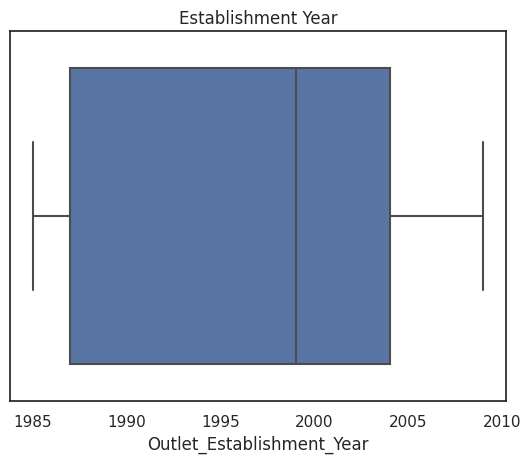

In [284]:
# Creating a boxplot view the Outlet_Establishment_Year
ax = sns.boxplot(data = df_sales, x ='Outlet_Establishment_Year');
#Adding a title
ax.set_title('Establishment Year');

**Visualizing Countplots**

In [285]:
## Define the value counts of each label in the 'Item_Type' column
## Include nan values by using 'dropna = False'
## Sort the value counts using .sort_values()
Item_value_counts = df_sales['Item_Type'].value_counts(dropna= False).sort_values()

In [286]:
df_sales['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

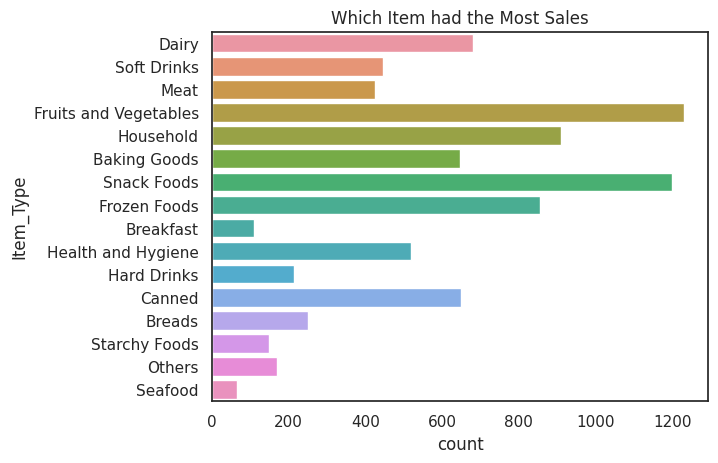

In [287]:
# Creating a countplot view the Item Type
ax = sns.countplot(data = df_sales, y ='Item_Type')
sns.set(style='white')
#Adding Title
ax.set_title('Which Item had the Most Sales');

-From our visualization we can say Fruits and Vegetables had the most sales
 and Seafood Items were the least sold.

In [288]:
df_sales['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

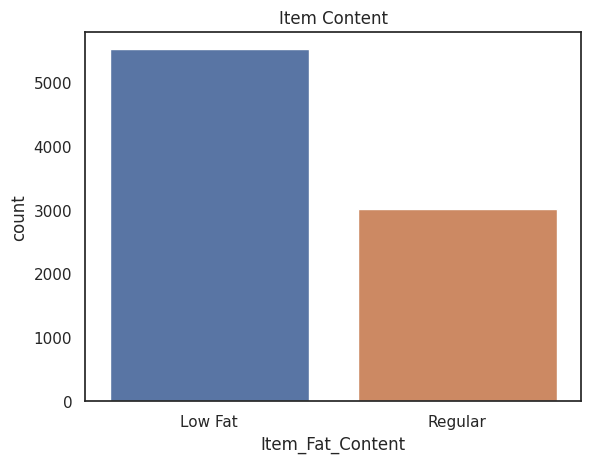

In [289]:
# Creating a countplot view the Item_Fat_Content
ax = sns.countplot(data = df_sales, x ='Item_Fat_Content')
sns.set(style='white')
#Adding title
ax.set_title('Item Content');

There were more low fat contents sold than the regulars

In [290]:
df_sales['Outlet_Size'].value_counts()

Medium     2793
missing    2410
Small      2388
High        932
Name: Outlet_Size, dtype: int64

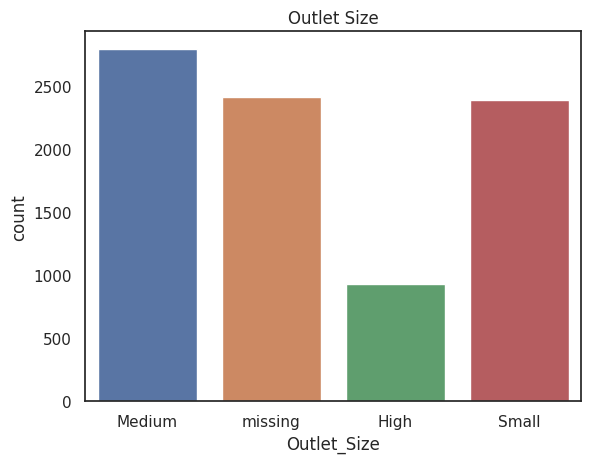

In [291]:
# Creating a countplot view the Item_Fat_Content
ax = sns.countplot(data = df_sales, x ='Outlet_Size')
sns.set(style='white')
#Adding title
ax.set_title('Outlet Size');

The medium outlets were a lot more than others and we also had missing outlets with the same amount as the small outlets.

In [292]:
df_sales['Outlet_Type'].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

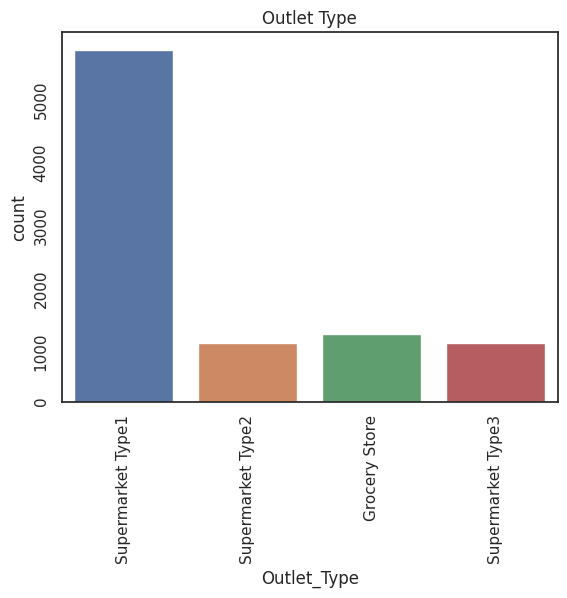

In [293]:
# Creating a countplot view the Outlet_Type
ax = sns.countplot(data = df_sales, x ='Outlet_Type')
sns.set(style='white')
# Rotate the tick values
ax.tick_params(rotation = 90)
#Adding title
ax.set_title('Outlet Type');

Supermarket type 1 were more that other supermarkets

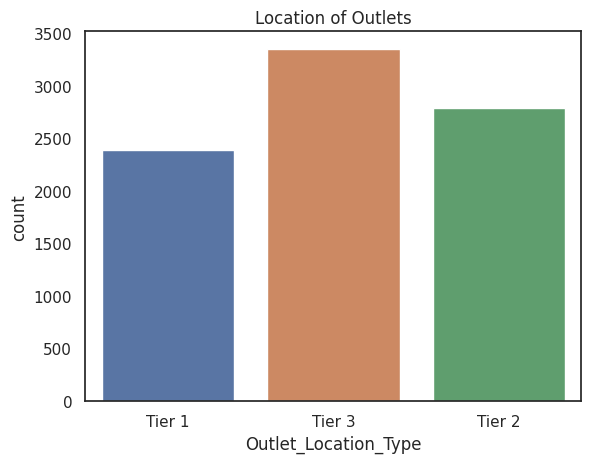

In [294]:
# Creating a countplot view the Outlet_Location_Type
ax = sns.countplot(data = df_sales, x ='Outlet_Location_Type')
sns.set(style='white')
#Adding title
ax.set_title('Location of Outlets');

There are more outlets located in Tier 3 than other tiers

In [295]:
# Find correlations
corr = df_sales.corr(numeric_only = True)

In [296]:
corr

,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Visibility,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,-0.128625,0.567574,-0.049135,1.000000


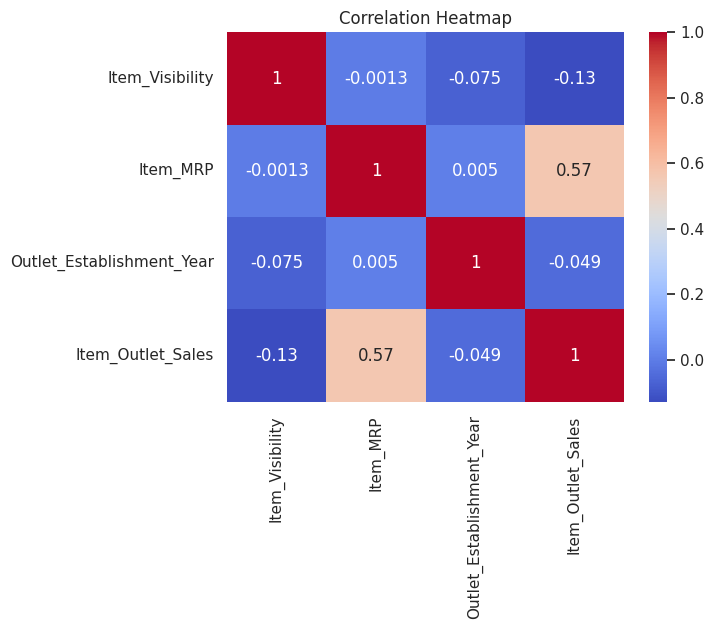

In [297]:
# Making a heatmap using the correlations from above
sns.heatmap(data=corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap');

In the heatmap above, since all of the values were below 0.3 in magnitude, we did not identify any relationships between variables in our dataset.

##Explanatory Data Analysis